In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
from pandas.tseries.offsets import MonthEnd, YearEnd
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# https://ecos.bok.or.kr/api/#/DevGuide/DevSpeciflcation
# 회사 Network은 보안장비들 때문에 SSL Verification Error가 발생하므로, requests.get할 때 verify = False하고, warning을 무시하도록 설정한다.
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# 한국은행 API를 사용하기 위한 인증정보를 설정한다.
BOK_API_URL = 'https://ecos.bok.or.kr/api'
BOK_API_KEY = 'W2HQL3IHAD2LKU409JDH'

In [3]:
def fetch_bok_data(service_code, stat_code = None):
    url = f'{BOK_API_URL}/{service_code}/{BOK_API_KEY}/json/kr/1/100000'
    
    if stat_code:
        url += f'/{stat_code}'
    
    print(url)
    
    resp = requests.get(url, verify = False)
    results = resp.json()
    rows = results[service_code]['row']
    df = pd.DataFrame(rows)
    
    return df

# 한국은행 ECOS API 서비스 통계 목록을 불러온다.

In [4]:
df = fetch_bok_data('StatisticItemList', stat_code='731Y001')

https://ecos.bok.or.kr/api/StatisticItemList/W2HQL3IHAD2LKU409JDH/json/kr/1/100000/731Y001


In [5]:
df

,STAT_CODE,STAT_NAME,GRP_CODE,GRP_NAME,ITEM_CODE,ITEM_NAME,P_ITEM_CODE,P_ITEM_NAME,CYCLE,START_TIME,END_TIME,DATA_CNT,UNIT_NAME,WEIGHT
0,731Y001,3.1.1.1. 주요국 통화의 대원화환율,Group1,계정항목,0000001,원/미국달러(매매기준율),None,None,D,19640504,20240809,16998,원,None
1,731Y001,3.1.1.1. 주요국 통화의 대원화환율,Group1,계정항목,0000053,원/위안(매매기준율),None,None,D,20160104,20240809,2125,원,None
2,731Y001,3.1.1.1. 주요국 통화의 대원화환율,Group1,계정항목,0000002,원/일본엔(100엔),None,None,D,19770401,20240809,13150,원,None
3,731Y001,3.1.1.1. 주요국 통화의 대원화환율,Group1,계정항목,0000003,원/유로,None,None,D,19940411,20240809,8112,원,None
4,731Y001,3.1.1.1. 주요국 통화의 대원화환율,Group1,계정항목,0000004,원/독일마르크,None,None,D,19640504,20011231,11170,원,None
5,731Y001,3.1.1.1. 주요국 통화의 대원화환율,Group1,계정항목,0000005,원/프랑스프랑,None,None,D,19641214,20020216,10968,원,None
6,731Y001,3.1.1.1. 주요국 통화의 대원화환율,Group1,계정항목,0000006,원/이태리리라(100리라),None,None,D,19641214,20020228,10980,원,None
7,731Y001,3.1.1.1. 주요국 통화의 대원화환율,Group1,계정항목,0000007,원/벨기에프랑,None,None,D,19700220,20020228,9488,원,None
8,731Y001,3.1.1.1. 주요국 통화의 대원화환율,Group1,계정항목,0000008,원/오스트리아실링,None,None,D,19700220,20020228,9483,원,None
9,731Y001,3.1.1.1. 주요국 통화의 대원화환율,Group1,계정항목,0000009,원/네덜란드길더,None,None,D,19700220,20020128,9464,원,None


In [6]:
# WON/YEN 환율을 불러와서 item에 저장한다.
item = df.loc[2]

In [7]:
item

STAT_CODE                     731Y001
STAT_NAME      3.1.1.1. 주요국 통화의 대원화환율
GRP_CODE                       Group1
GRP_NAME                         계정항목
ITEM_CODE                     0000002
ITEM_NAME                 원/일본엔(100엔)
P_ITEM_CODE                      None
P_ITEM_NAME                      None
CYCLE                               D
START_TIME                   19770401
END_TIME                     20240809
DATA_CNT                        13150
UNIT_NAME                          원 
WEIGHT                           None
Name: 2, dtype: object

In [8]:
def fetch_bok_data(service_code, stat_code = None, item = None):
    url = f'{BOK_API_URL}/{service_code}/{BOK_API_KEY}/json/kr/1/100000'
    
    if item is not None:
        url += '/{}/{}/{}/{}/{}'.format(item['STAT_CODE'], item['CYCLE'], item['START_TIME'], item['END_TIME'], item['ITEM_CODE'])

        if type(item['ITEM_CODE2']) is str:
            url += f'/{item['ITEM_CODE2']}'
        
    elif stat_code is not None:
        url += f'/{stat_code}'
    
    print(url)
    
    resp = requests.get(url, verify = False)
    results = resp.json()
    rows = results[service_code]['row']
    df = pd.DataFrame(rows)
    
    return df

In [9]:
df_xr = fetch_bok_data('StatisticSearch', item = item)

https://ecos.bok.or.kr/api/StatisticSearch/W2HQL3IHAD2LKU409JDH/json/kr/1/100000/731Y001/D/19770401/20240809/0000002


In [10]:
df_xr

,STAT_CODE,STAT_NAME,ITEM_CODE1,ITEM_NAME1,ITEM_CODE2,ITEM_NAME2,ITEM_CODE3,ITEM_NAME3,ITEM_CODE4,ITEM_NAME4,UNIT_NAME,WGT,TIME,DATA_VALUE
0,731Y001,3.1.1.1. 주요국 통화의 대원화환율,0000002,원/일본엔(100엔),None,None,None,None,None,None,원,None,19770401,174.5
1,731Y001,3.1.1.1. 주요국 통화의 대원화환율,0000002,원/일본엔(100엔),None,None,None,None,None,None,원,None,19770402,174.5
2,731Y001,3.1.1.1. 주요국 통화의 대원화환율,0000002,원/일본엔(100엔),None,None,None,None,None,None,원,None,19770404,174.5
3,731Y001,3.1.1.1. 주요국 통화의 대원화환율,0000002,원/일본엔(100엔),None,None,None,None,None,None,원,None,19770406,177.4
4,731Y001,3.1.1.1. 주요국 통화의 대원화환율,0000002,원/일본엔(100엔),None,None,None,None,None,None,원,None,19770407,177.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13145,731Y001,3.1.1.1. 주요국 통화의 대원화환율,0000002,원/일본엔(100엔),None,None,None,None,None,None,원,None,20240805,938.67
13146,731Y001,3.1.1.1. 주요국 통화의 대원화환율,0000002,원/일본엔(100엔),None,None,None,None,None,None,원,None,20240806,937.18
13147,731Y001,3.1.1.1. 주요국 통화의 대원화환율,0000002,원/일본엔(100엔),None,None,None,None,None,None,원,None,20240807,949.49
13148,731Y001,3.1.1.1. 주요국 통화의 대원화환율,0000002,원/일본엔(100엔),None,None,None,None,None,None,원,None,20240808,940.13


In [11]:
df_xr = df_xr[['TIME', 'DATA_VALUE']]
df_xr['date'] = pd.to_datetime(df_xr['TIME'])
df_xr = df_xr.set_index('date')
del df_xr['TIME']
df_xr.columns = ['KRW/JPY']
df_xr['KRW/JPY'] = df_xr['KRW/JPY'].astype(float)
df_xr.to_excel('krw_jpy_xr.xlsx')

In [12]:
df_xr

,KRW/JPY
date,
1977-04-01,174.50
1977-04-02,174.50
1977-04-04,174.50
1977-04-06,177.40
1977-04-07,177.23
...,...
2024-08-05,938.67
2024-08-06,937.18
2024-08-07,949.49


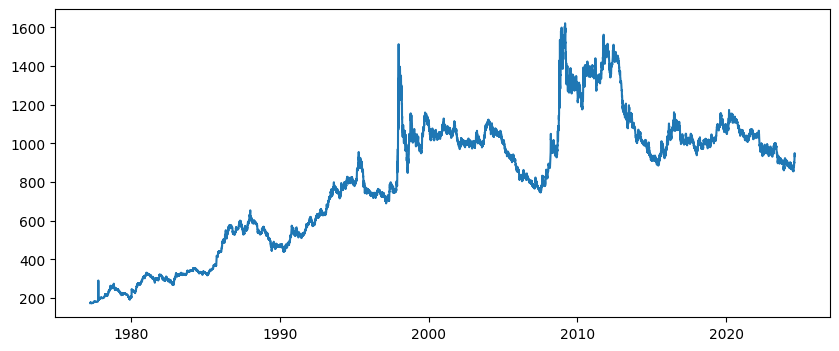

In [13]:
plt.rcParams['figure.figsize'] = (10, 4)
plt.plot(df_xr['KRW/JPY'])
plt.show()

### Convert to monthly observations
#### End-of-month observation

In [14]:
df_monthly = df_xr.resample('ME').last()
df_monthly['ret'] = df_monthly['KRW/JPY'].pct_change() * 100

In [15]:
df_monthly.head(3)

,KRW/JPY,ret
date,,
1977-04-30,174.28,NaN
1977-05-31,174.67,0.223778
1977-06-30,180.11,3.114444


### 환율 변화율을 예측하기

In [16]:
df_monthly = df_monthly.dropna()

* IMF 이전 환율정책:

IMF 외환위기 이전 한국은 '관리변동환율제'를 채택하고 있었습니다.
이 제도 하에서 정부는 환율의 일일 변동폭을 제한하고, 외환시장에 직접 개입하여 환율을 관리했습니다.


* IMF 이후 환율정책:

1997년 12월 IMF 구제금융을 받으면서 한국은 '자유변동환율제'로 전환했습니다.
이 제도에서는 원칙적으로 시장의 수요와 공급에 따라 환율이 결정됩니다.
정부의 직접적인 시장 개입은 크게 줄어들었습니다

* 아베노믹스 (2012년~): 2012년 12월 26일

영향력: 매우 큼
지속기간: 장기적 (수년간 지속)
직접성: 엔화 환율에 직접적인 영향
의도성: 의도적인 엔화 약세 정책

아베노믹스는 일본 경제 회복을 위해 의도적으로 엔화 가치를 낮추는 정책을 포함했습니다. 이로 인해 엔화 가치가 급격히 하락했고, 원/엔 환율에 지속적이고 큰 영향을 미쳤습니다.

In [17]:
df_post_abe = df_monthly.loc['2012-12-26':]

In [18]:
X = df_post_abe.iloc[:-1]['ret']
X = sm.add_constant(X)
Y = df_post_abe.iloc[1:]['ret']

In [19]:
model = sm.OLS(Y, X.values)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ret   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                   0.02576
Date:                Sat, 10 Aug 2024   Prob (F-statistic):              0.873
Time:                        08:41:39   Log-Likelihood:                -323.52
No. Observations:                 140   AIC:                             651.0
Df Residuals:                     138   BIC:                             656.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1733      0.209     -0.830      0.408      -0.586       0.239
x1             0.0135      0.084      0.160      0.873      -0.153       0.180
==============================================================================
Omnibus:                        0.600   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.595
Skew:                           0.154   Prob(JB):                        0.743
Kurtosis:                       2.913   Cond. No.                         2.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

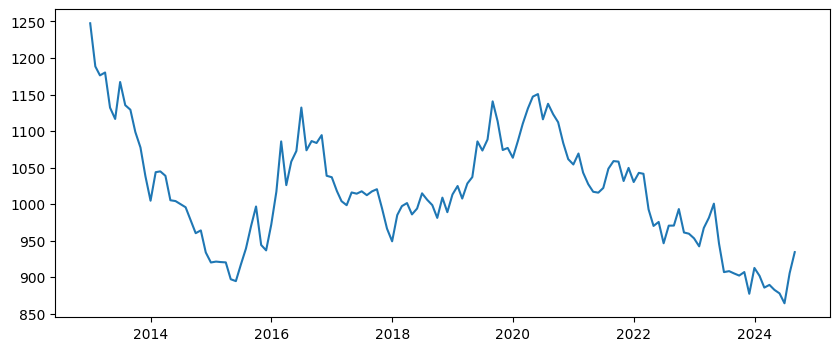

In [20]:
plt.rcParams['figure.figsize'] = (10, 4)
plt.plot(df_post_abe['KRW/JPY'])
plt.show()

In [23]:
df_real_xr = pd.read_excel('data/world_real_xr.xls', sheet_name='Data', skiprows=3)

In [24]:
df_real_xr = df_real_xr.set_index('Country Code')

df_real_xr_kor = df_real_xr.loc['KOR'].to_frame()
df_real_xr_kor = df_real_xr_kor.iloc[3:]
df_real_xr_kor = df_real_xr_kor.dropna()
df_real_xr_kor['KOR'] = df_real_xr_kor['KOR'].astype(float)
df_real_xr_kor['date'] = pd.to_datetime(df_real_xr_kor.index) + YearEnd()
df_real_xr_kor = df_real_xr_kor.set_index('date')
df_real_xr_kor.columns = ['KOR Real XR']
df_real_xr_kor.head()

,KOR Real XR
date,
1990-12-31,0.791111
1991-12-31,0.806041
1992-12-31,0.797916
1993-12-31,0.805471
1994-12-31,0.852152


In [25]:
df_real_xr_jpn = df_real_xr.loc['JPN'].to_frame()
df_real_xr_jpn = df_real_xr_jpn.iloc[3:]
df_real_xr_jpn = df_real_xr_jpn.dropna()
df_real_xr_jpn['JPN'] = df_real_xr_jpn['JPN'].astype(float)
df_real_xr_jpn['date'] = pd.to_datetime(df_real_xr_jpn.index) + YearEnd()
df_real_xr_jpn = df_real_xr_jpn.set_index('date')
df_real_xr_jpn.columns = ['JPN Real XR']
df_real_xr_jpn.head()

,JPN Real XR
date,
1990-12-31,1.295738
1991-12-31,1.386324
1992-12-31,1.465824
1993-12-31,1.639495
1994-12-31,1.749671


In [27]:
# 기존의 KOR와 JPN 데이터프레임을 합칩니다
df_combined = pd.concat([df_real_xr_kor, df_real_xr_jpn], axis = 1)

# KRW/100JPY 실질환율 계산
# KRW/USD를 JPY/USD로 나누고 100을 곱합니다 (100엔 기준으로 변환)
df_combined['KRW/100JPY Real XR'] = df_combined['KOR Real XR'] / (df_combined['JPN Real XR'] * 100)

# 결과 확인
df_combined.tail()

,KOR Real XR,JPN Real XR,KRW/100JPY Real XR
date,,,
2019-12-31,0.727286,0.946994,0.007680
2020-12-31,0.702688,0.943502,0.007448
2021-12-31,0.723172,0.899195,0.008042
2022-12-31,0.627537,0.721953,0.008692
2023-12-31,0.612982,0.673903,0.009096


In [28]:
df_real_xr = df_combined['KRW/100JPY Real XR']

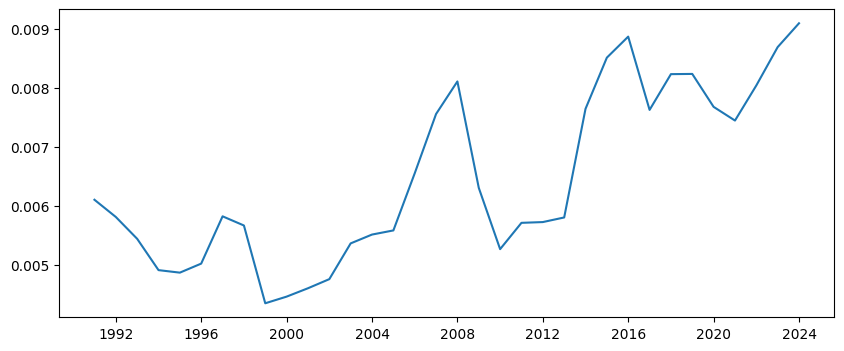

In [29]:
plt.plot(df_real_xr)
plt.show()

## Overlapping monthly forecasts

In [30]:
df_monthly = df_monthly.drop('ret', axis = 1)
df_merged = df_monthly.join(df_real_xr)
# ffill - forward fill
# bfill - backward fill
df_merged['KRW/100JPY Real XR'] = df_merged['KRW/100JPY Real XR'].fillna(method='ffill')

df_merged['ann_ret'] = df_merged['KRW/JPY'].pct_change(periods=12) * 100

df_merged['F12.ann_ret'] = df_merged['ann_ret'].shift(-12)

df_merged.head(15)


,KRW/JPY,KRW/100JPY Real XR,ann_ret,F12.ann_ret
date,,,,
1977-05-31,174.67,NaN,NaN,23.346883
1977-06-30,180.11,NaN,NaN,30.525790
1977-07-31,181.95,NaN,NaN,38.186315
1977-08-31,181.12,NaN,NaN,40.569788
1977-09-30,181.51,NaN,NaN,40.890309
1977-10-31,193.58,NaN,NaN,39.787168
1977-11-30,200.15,NaN,NaN,22.348239
1977-12-31,201.65,NaN,NaN,24.329283
1978-01-31,200.05,NaN,NaN,20.774806


### Use OLS to fit the forecast model

In [31]:
df = df_merged[['KRW/100JPY Real XR', 'F12.ann_ret']]
df = df.dropna()

In [32]:
X = df['KRW/100JPY Real XR']
X = sm.add_constant(X)
Y = df['F12.ann_ret']

In [33]:
model = sm.OLS(Y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            F12.ann_ret   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     6.386
Date:                Sat, 10 Aug 2024   Prob (F-statistic):             0.0119
Time:                        08:47:02   Log-Likelihood:                -1640.3
No. Observations:                 393   AIC:                             3285.
Df Residuals:                     391   BIC:                             3293.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -6.7069      3.770     -1.779      0.076     -14.119       0.705
KRW/100JPY Real XR  1465.1655    579.777      2.527      0.012     325.295    2605.036
==============================================================================
Omnibus:                      177.090   Durbin-Watson:                   0.152
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              844.783
Skew:                           1.935   Prob(JB):                    3.61e-184
Kurtosis:                       9.051   Cond. No.                         729.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Real XR 대신 PPP XR 활용하기

In [34]:
def load_world_bank_data(filepath, country, column):
    df = pd.read_excel(filepath, sheet_name='Data', skiprows = 3)

    df = df.set_index('Country Code')
    df = df.loc[country].to_frame()
    df = df.iloc[3:]
    df = df.dropna()
    df = df.astype(float)
    
    df['date'] = pd.to_datetime(df.index) + YearEnd()
    df = df.set_index('date')
    df.columns = [column]
    
    return df

In [36]:
df_ppp_xr_kor = load_world_bank_data('data/world_ppp_xr.xls', 'KOR', 'PPP XR')
df_ppp_xr_jpn = load_world_bank_data('data/world_ppp_xr.xls', 'JPN', 'PPP XR')

In [37]:
df_ppp_combined = pd.concat([df_ppp_xr_kor, df_ppp_xr_jpn], axis = 1)
df_ppp_combined.columns = ['KOR PPP XR', 'JPN PPP XR']
df_ppp_combined['KRW/100JPY PPP XR'] = df_ppp_combined['KOR PPP XR'] / (df_ppp_combined['JPN PPP XR'] * 100)
df_ppp_xr = df_ppp_combined.drop(['KOR PPP XR', 'JPN PPP XR'], axis = 1)

In [38]:
df_ppp_xr.head(3)

,KRW/100JPY PPP XR
date,
1990-12-31,0.029844
1991-12-31,0.031653
1992-12-31,0.033552


### Merge with monthly observations

In [39]:
df_merged = df_monthly.join(df_real_xr)
df_merged = df_merged.join(df_ppp_xr)
df_merged.head(3)

,KRW/JPY,KRW/100JPY Real XR,KRW/100JPY PPP XR
date,,,
1977-05-31,174.67,NaN,NaN
1977-06-30,180.11,NaN,NaN
1977-07-31,181.95,NaN,NaN


### Compute Real XR

In [40]:
df_merged['KRW/100JPY PPP XR'] = df_merged['KRW/100JPY PPP XR'].ffill()
df_merged.head(3)

,KRW/JPY,KRW/100JPY Real XR,KRW/100JPY PPP XR
date,,,
1977-05-31,174.67,NaN,NaN
1977-06-30,180.11,NaN,NaN
1977-07-31,181.95,NaN,NaN


In [41]:
df_merged['New Real XR'] = df_merged['KRW/100JPY PPP XR'] / df_merged['KRW/JPY'] * 100
df_merged.tail()

,KRW/JPY,KRW/100JPY Real XR,KRW/100JPY PPP XR,New Real XR
date,,,,
2024-04-30,882.68,NaN,0.084534,0.009577
2024-05-31,877.84,NaN,0.084534,0.009630
2024-06-30,864.31,NaN,0.084534,0.009781
2024-07-31,905.44,NaN,0.084534,0.009336
2024-08-31,934.32,NaN,0.084534,0.009048


In [42]:
df_merged['KRW/100JPY Real XR'] = df_merged['KRW/100JPY Real XR'].ffill()

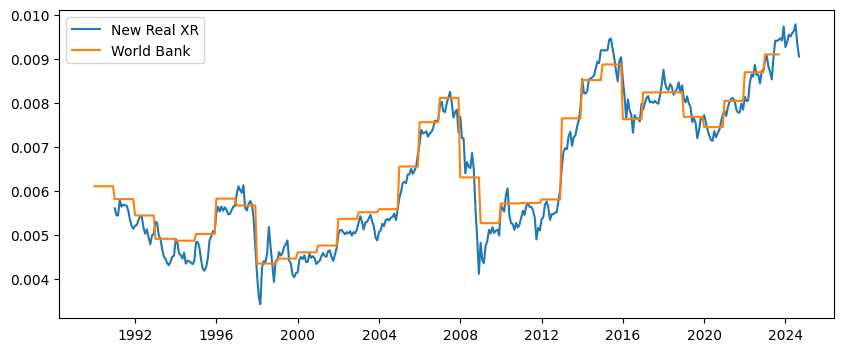

In [43]:
plt.plot(df_merged['New Real XR'], label='New Real XR')
plt.plot(df_merged['KRW/100JPY Real XR'].shift(-12), label='World Bank')
plt.legend()
plt.show()

## Compute annual XR return

In [44]:
df_merged['ann_ret'] = df_merged['KRW/JPY'].pct_change(periods = 12) * 100
df_merged['F12.ann_ret'] = df_merged['ann_ret'].shift(-12)
df_merged.head(5)

,KRW/JPY,KRW/100JPY Real XR,KRW/100JPY PPP XR,New Real XR,ann_ret,F12.ann_ret
date,,,,,,
1977-05-31,174.67,NaN,NaN,NaN,NaN,23.346883
1977-06-30,180.11,NaN,NaN,NaN,NaN,30.525790
1977-07-31,181.95,NaN,NaN,NaN,NaN,38.186315
1977-08-31,181.12,NaN,NaN,NaN,NaN,40.569788
1977-09-30,181.51,NaN,NaN,NaN,NaN,40.890309


### Use OLS to fit the forecast model

In [45]:
df = df_merged[['New Real XR', 'F12.ann_ret']]
df = df.dropna()

In [46]:
X = df['New Real XR']
X = sm.add_constant(X)
Y = df['F12.ann_ret']

In [47]:
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            F12.ann_ret   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.088
Date:                Sat, 10 Aug 2024   Prob (F-statistic):              0.297
Time:                        08:51:31   Log-Likelihood:                -1642.9
No. Observations:                 393   AIC:                             3290.
Df Residuals:                     391   BIC:                             3298.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.7687      3.333     -0.231      0.818      -7.321       5.784
New Real XR   536.8330    514.582      1.043      0.297    -474.860    1548.526
==============================================================================
Omnibus:                      181.401   Durbin-Watson:                   0.147
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              889.800
Skew:                           1.980   Prob(JB):                    6.06e-194
Kurtosis:                       9.218   Cond. No.                         643.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Predict XR

In [48]:
last_obs = df_merged.iloc[-1]
last_obs

KRW/JPY               934.320000
KRW/100JPY Real XR      0.009096
KRW/100JPY PPP XR       0.084534
New Real XR             0.009048
ann_ret                 3.231794
F12.ann_ret                  NaN
Name: 2024-08-31 00:00:00, dtype: float64

In [49]:
last_xr = last_obs['KRW/JPY']
last_real_xr = last_obs['New Real XR']

In [50]:
last_xr

np.float64(934.32)

In [51]:
last_real_xr

np.float64(0.009047673662483777)

### OLS 결과 그대로 사용하여 예측

In [52]:
#exogeneous variables
exog = [1, last_real_xr]
results.predict(exog = exog)

array([4.08843257])

### Confidence Interval

In [54]:
for alpha in [0.05, 0.25, 0.50]:
    prstd, iv_l, iv_u = wls_prediction_std(results, exog = exog, alpha = alpha)
    
    print('Confidence interval at alpha = {:.2f}: {:.2f} ~ {:.2f}'.format(
        alpha,
        iv_l[0],
        iv_u[0],
    ))

Confidence interval at alpha = 0.05: -27.27 ~ 35.44
Confidence interval at alpha = 0.25: -14.28 ~ 22.46
Confidence interval at alpha = 0.50: -6.68 ~ 14.86


### 환율 예측하기

In [55]:
pred_ret = results.predict(exog = exog)
last_xr * (1 + pred_ret[0] / 100)

np.float64(972.5190431444418)

In [56]:
for alpha in [0.05, 0.25, 0.50]:
    prstd, iv_l, iv_u = wls_prediction_std(results, exog = exog, alpha = alpha)
    
    print('Confidence interval at alpha = {:.2f}: {:.2f} ~ {:.2f}'.format(
        alpha,
        last_xr * (1 + iv_l[0] / 100),
        last_xr * (1 + iv_u[0] / 100),
    ))

Confidence interval at alpha = 0.05: 679.57 ~ 1265.47
Confidence interval at alpha = 0.25: 800.86 ~ 1144.18
Confidence interval at alpha = 0.50: 871.92 ~ 1073.12


## 추가 지표 획득

In [57]:
TARGET_STAT_CODES = [
    '731Y001',  # 3.1.1.1. 주요국 통화의 대원화환율
    '902Y008',  # 9.1.2.2. 국제 주요국 소비자물가지수
    '902Y009',  # 9.1.3.1. 국제 주요국 경상수지
    '902Y015',  # 9.1.4.1. 국제 주요국 경제성장률
    '902Y016',  # 9.1.4.2. 국제 주요국 국내총생산(GDP)
    '902Y023',  # 9.1.6.1. 주요국제금리
    '817Y002',  # 1.3.2.1. 시장금리(일별)
    '732Y001',  # 3.5. 외환보유액
]

In [58]:
dfs = []

for stat_code in TARGET_STAT_CODES:
    df = fetch_bok_data('StatisticItemList', stat_code = stat_code)
    
    dfs.append(df)

https://ecos.bok.or.kr/api/StatisticItemList/W2HQL3IHAD2LKU409JDH/json/kr/1/100000/731Y001
https://ecos.bok.or.kr/api/StatisticItemList/W2HQL3IHAD2LKU409JDH/json/kr/1/100000/902Y008
https://ecos.bok.or.kr/api/StatisticItemList/W2HQL3IHAD2LKU409JDH/json/kr/1/100000/902Y009
https://ecos.bok.or.kr/api/StatisticItemList/W2HQL3IHAD2LKU409JDH/json/kr/1/100000/902Y015
https://ecos.bok.or.kr/api/StatisticItemList/W2HQL3IHAD2LKU409JDH/json/kr/1/100000/902Y016
https://ecos.bok.or.kr/api/StatisticItemList/W2HQL3IHAD2LKU409JDH/json/kr/1/100000/902Y023
https://ecos.bok.or.kr/api/StatisticItemList/W2HQL3IHAD2LKU409JDH/json/kr/1/100000/817Y002
https://ecos.bok.or.kr/api/StatisticItemList/W2HQL3IHAD2LKU409JDH/json/kr/1/100000/732Y001


In [59]:
df_item_codes = pd.concat(dfs, axis = 0)

In [60]:
df_item_codes.to_excel('data/bok_item_codes.xlsx', index = False)

In [61]:
df_item_codes = df_item_codes.set_index(['STAT_CODE', 'ITEM_CODE', 'CYCLE'])

### Download data values

In [63]:
data_download_list = pd.read_excel('data/bok_data_download_list_jpy.xlsx')

In [64]:
data_download_list

,name,STAT_CODE,STAT_NAME,ITEM_CODE,ITEM_CODE2,ITEM_NAME,CYCLE,UNIT_NAME
0,krw_100jpy_xr,731Y001,3.1.1.1. 주요국 통화의 대원화환율,0000002,NaN,원/일본엔(100엔),D,원
1,cpi_korea,902Y008,9.1.2.2. 국제 주요국 소비자물가지수,KR,NaN,한국,M,2010=100
2,cpi_jp,902Y008,9.1.2.2. 국제 주요국 소비자물가지수,JP,NaN,일본,M,2010=100
3,cpi_us,902Y008,9.1.2.2. 국제 주요국 소비자물가지수,US,NaN,미국,M,2010=100
4,current_account_korea,902Y009,9.1.3.1. 국제 주요국 경상수지,KR,NaN,한국,Q,백만달러
5,current_account_jp,902Y009,9.1.3.1. 국제 주요국 경상수지,JP,NaN,일본,Q,백만달러
6,current_account_us,902Y009,9.1.3.1. 국제 주요국 경상수지,US,NaN,미국,Q,백만달러
7,gdp_growth_korea,902Y015,9.1.4.1. 국제 주요국 경제성장률,KOR,NaN,한국,Q,%
8,gdp_growth_jp,902Y015,9.1.4.1. 국제 주요국 경제성장률,JPN,NaN,일본,Q,%
9,gdp_growth_us,902Y015,9.1.4.1. 국제 주요국 경제성장률,USA,NaN,미국,Q,%
